In [10]:
# Gain modulation RNN, only BP, no synaptic learning
import numpy as np
import sys
sys.path.append("..")
from rnn_basic import RNN
import matplotlib.pyplot as plt
import json
import torch

## Loading Trained Weights

In [11]:
with open('../weights/SIN_bpgain_128_nodes/weight_history.json') as f:
    weight_history = json.load(f)

In [12]:
weight_history.keys()

dict_keys(['trained gain', 'trained shift', 'trained weights', 'connectivity matrix', 'input weights', 'output weights', 'losses'])

In [13]:
gain = np.array(weight_history['trained gain'])
shift = np.array(weight_history['trained shift'])
weight_matrix = np.array(weight_history['trained weights'])
connectivity_matrix = np.array(weight_history['connectivity matrix'])
input_weight_matrix = np.array(weight_history['input weights'])
output_weight_matrix = np.array(weight_history['output weights'])
losses = np.array(weight_history['losses'])

## Defining Network

In [22]:
time_constant = 100 #ms
timestep = 10 #ms
num_nodes = 128
init_activation = np.zeros((num_nodes, 1))

network = RNN(weight_matrix, connectivity_matrix, init_activation, gain, shift, input_weight_matrix, output_weight_matrix, 
                time_constant = time_constant, timestep = timestep)

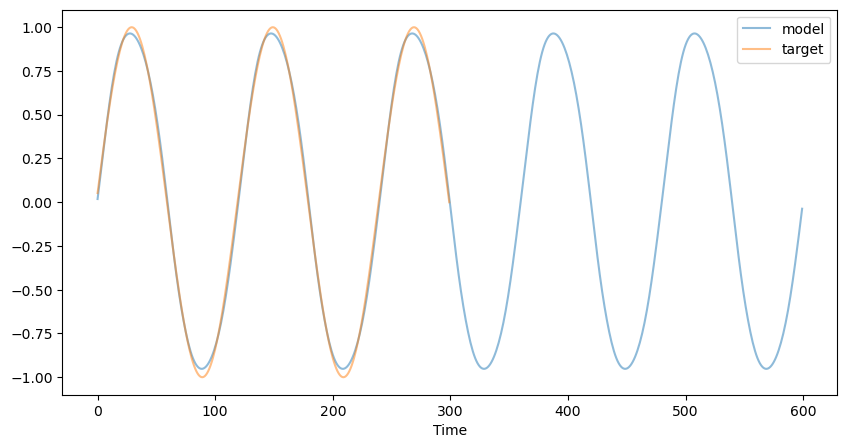

In [28]:
ndata = 600
time = ndata * timestep
time_points = np.arange(ndata).reshape(-1, 1)
inputs = np.sin(time_points/60*np.pi)
inputs = inputs.reshape(-1, 1)
outputs, activations = network.simulate(time, torch.tensor(inputs).float())

targets = np.sin((time_points+1)/60*np.pi)[0:300]
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(time_points, outputs.detach().numpy(), alpha=0.5, label='model')
plt.plot(np.arange(len(targets)), targets, alpha=0.5, label='target')
plt.xlabel('Time')
plt.legend()
plt.savefig("fig/1016_SIN_bpgain_output.png")

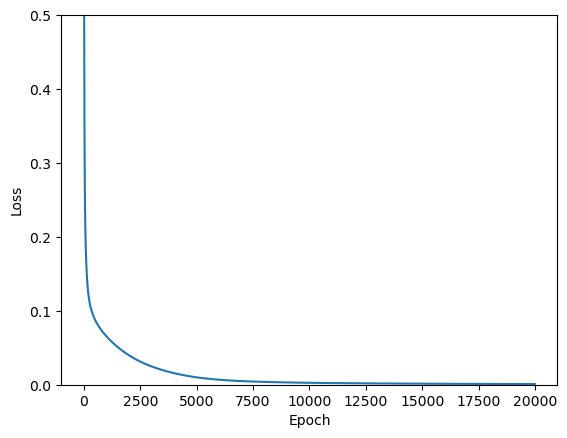

In [29]:
plt.plot(np.arange(len(losses)), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.ylim([0,0.5])
plt.savefig("fig/1016_SIN_bpgain_loss.png")